# G.U.C.E. Test #1

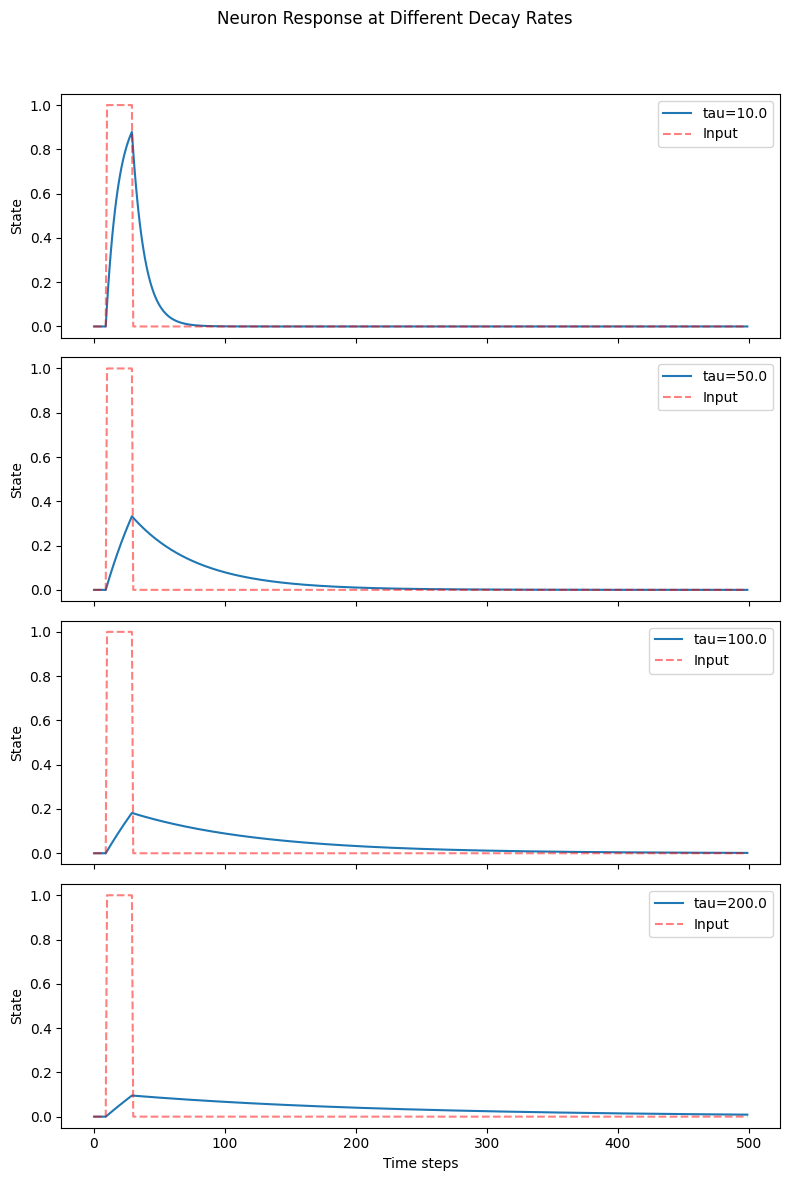

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LTCNeuron:
    def __init__(self, tau=100.0, resting_state=0.0):
        """
        A simple LTC-like neuron.
        
        Args:
            tau (float): The time constant representing how slowly the neuron decays to baseline.
                         Larger tau -> slower decay -> longer memory retention.
            resting_state (float): The baseline state of the neuron when no input is present.
        """
        self.tau = tau
        self.resting_state = resting_state
        self.state = resting_state

    def update(self, input_signal, dt=1.0):
        """
        Update the neuron state by one time step.
        
        LTC-like rule: dx/dt = (input - x)/tau
        """
        dstate = (input_signal - self.state) / self.tau
        self.state += dstate * dt
        return self.state

# Simulation parameters
time_steps = 500
dt = 1.0
input_pattern = np.zeros(time_steps)
# Let's create a short input pulse at the start
input_pattern[10:30] = 1.0

# Different decay rates to simulate worm-like vs human-like
decay_times = [10.0, 50.0, 100.0, 200.0]  # Smaller is faster decay (worm), larger is slower decay (human)

fig, axes = plt.subplots(len(decay_times), 1, figsize=(8, 12), sharex=True)
for i, tau in enumerate(decay_times):
    neuron = LTCNeuron(tau=tau)
    states = []
    for t in range(time_steps):
        state = neuron.update(input_pattern[t], dt=dt)
        states.append(state)
    axes[i].plot(states, label=f"tau={tau}")
    axes[i].plot(input_pattern, 'r--', alpha=0.5, label="Input")
    axes[i].set_ylabel("State")
    axes[i].legend()
axes[-1].set_xlabel("Time steps")

plt.suptitle("Neuron Response at Different Decay Rates")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()
